In [23]:
import numpy as np
from photutils.aperture import ellipse
    
#Ellipse Mask:
#NOTE: elliptical apperature uses the following coordinate convention:
#" In Photutils, pixel coordinates are zero-indexed, meaning that (x, y) = (0, 0) corresponds to the center of the
#   lowest, leftmost array element. This means that the value of data[0, 0] is taken as the value over the range -0.5 <
#   x <= 0.5, -0.5 < y <= 0.5. 
#
#Note that this differs from the SourceExtractor, IRAF, FITS, and ds9 conventions, in
#   which the center of the lowest, leftmost array element is (1, 1). See pg.59 in http://star-www.dur.ac.uk/~pdraper/extractor/Guide2source_extractor.pdf"
#Source: https://buildmedia.readthedocs.org/media/pdf/photutils/v0.3/photutils.pdf

#DOCUMENTATION: https://photutils.readthedocs.io/en/stable/api/photutils.aperture.EllipticalAperture.html

def create_elliptical_mask(h, k, a, b, theta, shape=(240,240)):
    the_ellipse = ellipse.EllipticalAperture((h,k), a, b, theta=theta)
    mask = the_ellipse.to_mask(method='exact')
    return mask.to_image(shape) #don't convert to int with .astype(int), there's a really weird bug

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

def writeFits(path,data):
    #write fits file to path
    hdul = fits.PrimaryHDU(data)
    hdul.writeto(path)

def readFits(path):
    #read fits files
    hdul = fits.open(path)
    data = hdul[0].data
    return data

def viewFits(fits_to_view,title="", save_path = ""):
    plt.figure(figsize=(20,10))
    plt.imshow(fits_to_view, origin= 'lower') #, cmap='gray' #,cmap='inferno'
    plt.title(title)
    plt.colorbar()
    if save_path != "":
        plt.savefig(save_path)
    else:
        plt.show()
    plt.clf()
    plt.close()

In [24]:
def read_sextractor_file(file_path):
    keys = []
    objects = []
    
    with open(file_path,"r") as f:
        for line in f:
            if line.startswith('#'):
                current_key = line.split()[2] #split() (no args) splits on all whitespace: https://stackoverflow.com/a/4309689
                keys.append(current_key)
            else:
                values = map(lambda x: float(x), line.split())
                objects.append(dict(zip(keys,values)))
    return objects

In [71]:
def make_star_mask(file_path,the_size):
    objects = read_sextractor_file(pa)
    the_final_mask = np.zeros((the_size,the_size))
    
    #print(objects)
    
    """
    top_gal_dict = None
    max_size = 0
    
    for gal_dict in objects:
        the_size = gal_dict["A_IMAGE"]+gal_dict["B_IMAGE"]
        if the_size > max_size:
            top_gal_dict = gal_dict
            max_size = the_size
    
    the_mask = ellipse_mask = create_elliptical_mask(top_gal_dict['XWIN_IMAGE']-1,
                                                     top_gal_dict['YWIN_IMAGE']-1,
                                                     top_gal_dict['A_IMAGE'],
                                                     top_gal_dict['B_IMAGE'],
                                                     top_gal_dict['THETA_IMAGE'],
                                                     shape=(360,360))
                                                     
    """
    for gal_dict in objects:
        the_mask = create_elliptical_mask(gal_dict['XWIN_IMAGE']-1,
                                          gal_dict['YWIN_IMAGE']-1,
                                          gal_dict['A_IMAGE'],
                                          gal_dict['B_IMAGE'],
                                          gal_dict['THETA_IMAGE'],
                                          shape=(the_size,the_size))
        #print(type(the_final_mask))
        the_final_mask += the_mask
        
    viewFits(the_final_mask)

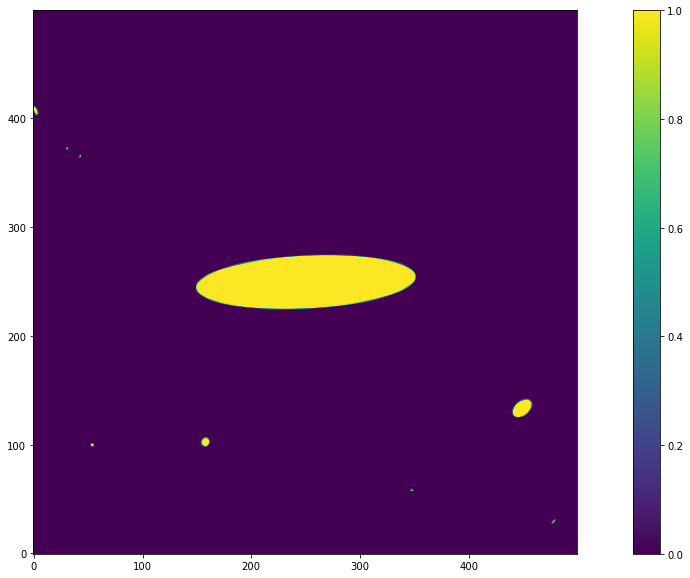

In [73]:
name="NGC1035"
band="z"
the_size=500

pa = "/Users/cora-at-work/Desktop/github/spin-parity-catalog/output_from_running/sextractor/table2/{}/{}_{}.sex".format(name,name,band)
make_star_mask(pa,the_size)
#NGC1035:500